# Handwritten Digit Classification

In [ ]:
import numpy as np
import random as rd

## Part 1

### 1.1 Downloading, merging, flattening and binarizing the data

In [ ]:
#loading mnist data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Image Label =  7


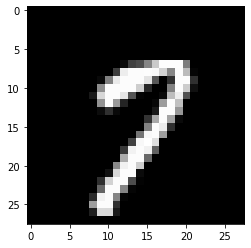

In [ ]:
#an example from training data
import matplotlib.pyplot as plt
image_index = 9999 # You may select anything up to 60,000
print('Image Label = ',y_train[image_index]) 
plt.imshow(x_train[image_index], cmap = 'gray')
plt.show()

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [ ]:
#merge training and testing
x_merge = np.concatenate((x_train, x_test), axis = 0)
y_merge = np.concatenate((y_train, y_test), axis = 0)

In [ ]:
#flattening
x_flat = x_merge.reshape(x_merge.shape[0], x_merge.shape[1]*x_merge.shape[2])

In [ ]:
#binarization
x_bin = np.where(x_flat>50, 1.0, 0.0)

### 1.2 Splitting the data into training, validation and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#split to obtain a testing dataset
x_temp, x_test, y_temp, y_test = train_test_split(x_bin, y_merge, test_size = 0.20, random_state = 0)

#split temp_x and temp_y further into training and validation
x_train, x_valid, y_train, y_valid = train_test_split(x_temp, y_temp, test_size = 0.20, random_state = 1)

In [ ]:
print(x_train.shape, x_valid.shape, x_test.shape)

(44800, 784) (11200, 784) (14000, 784)


## Part 2 
### 2.1 Drawing subset of 20 features and building a decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#building the training data of only 20 dimensions
sub = 20
clsfr = DecisionTreeClassifier(max_depth = 5)

n = 50 #number of classifiers
dim = np.zeros((n, sub))

rd.seed(0)

for i in range(n):
  dim[i] = rd.sample(range(x_train.shape[1]), sub) #chooses 20 dimensions without repetition


In [ ]:
weights = np.zeros(n)
for i in range(0, n): #i-th training set to be created for i-th classifier
  #define training set(s) with bagging of features
  x_train_sub = np.zeros(x_train.shape)
  for j in range(0, x_train.shape[0]): #create column-wise
    rd.seed(i+99)
    temp = rd.choices(dim[i], k = 784)
    for k in range(x_train.shape[1]):
      x_train_sub[j, k] = x_train[j, int(temp[k])]
  clsfr.fit(x_train_sub, y_train)

  y_pred = classifier.predict(y_valid)
  accuracy = accuracy_score(y_test, y_pred)
  weights[i] = accuracy



KeyboardInterrupt: ignored

In [ ]:
type(x_train_sub)

In [ ]:
#y_pred_onvalid = clsfr.predict(x_valid)

In [ ]:
x_train[1,1]